In [1]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PlotFuncs import *
from AxionFuncs import *
from matplotlib import colors as c
import cmasher as cmr

# Mixings
n = 1000
fvals = logspace(7,16,n)
epsvals = logspace(-4,0,n)

ADMX_m1 = MapHaloscope_m1('Projections/ADMX_Projected',fvals,epsvals)
ADMX_m2 = MapHaloscope_m2('Projections/ADMX_Projected',fvals,epsvals)

IAXO_m1 = MapHelioscope_m1('Projections/IAXO_plus',fvals,epsvals)
IAXO_m2 = MapHelioscope_m2('Projections/IAXO_plus',fvals,epsvals)

DMRadio_m1 = MapHaloscope_m1('Projections/DMRadio',fvals,epsvals)
DMRadio_m2 = MapHaloscope_m2('Projections/DMRadio',fvals,epsvals)


/Users/ciaranohare/Work/CompAxion/PlotFuncs.py:63: UserWarning: No contour levels were found within the data range.
  ax.contour(fvals,epsvals,con,levels=[0],linewidths=lw,colors=edgecolor,linestyles=linestyle,zorder=zorder)


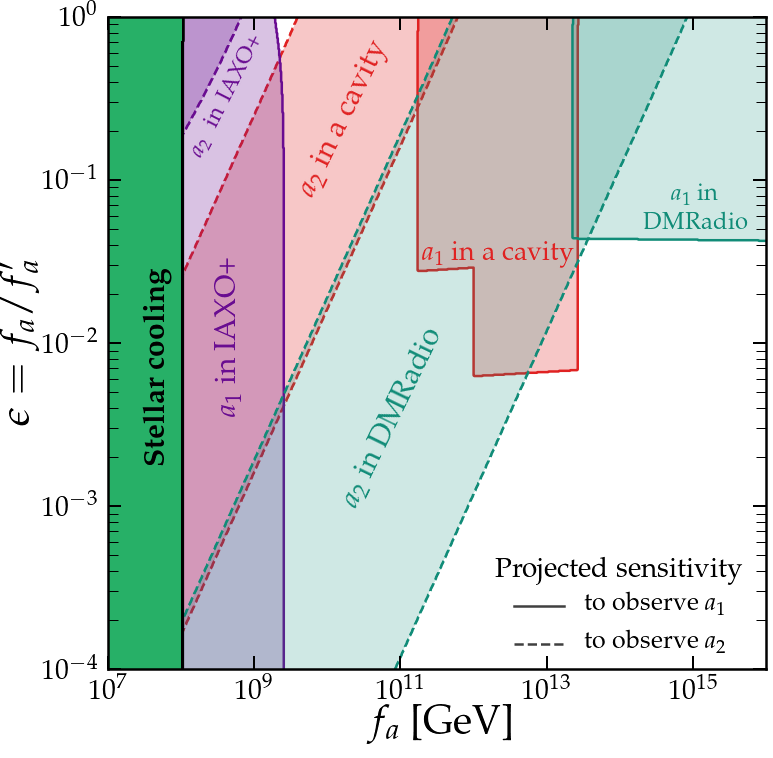

In [7]:
fig,ax = Plot_PQscales_OnePanel(fvals,epsvals,lfs=40,size_x=11.8)

PlotContour(ax,fvals,epsvals,ADMX_m1,zorder=-1,alpha=0.25,lw=2.5,facecolor=ADMX_col,edgecolor=ADMX_col,edge_on=True,linestyle='-')
PlotContour(ax,fvals,epsvals,ADMX_m2,zorder=-1,alpha=0.25,lw=2.5,facecolor=ADMX_col,edgecolor=ADMX_col,edge_on=True,linestyle='--')

PlotContour(ax,fvals,epsvals,IAXO_m1,zorder=-1,alpha=0.25,lw=2.5,facecolor=IAXO_col,edgecolor=IAXO_col,edge_on=True,linestyle='-')
PlotContour(ax,fvals,epsvals,IAXO_m2,zorder=-1,alpha=0.25,lw=2.5,facecolor=IAXO_col,edgecolor=IAXO_col,edge_on=True,linestyle='--')

PlotContour(ax,fvals,epsvals,DMRadio_m1,zorder=-1,alpha=0.2,lw=2.5,facecolor=DMRadio_col,edgecolor=DMRadio_col,edge_on=True,linestyle='-')
PlotContour(ax,fvals,epsvals,DMRadio_m2,zorder=-1,alpha=0.2,lw=2.5,facecolor=DMRadio_col,edgecolor=DMRadio_col,edge_on=True,linestyle='--')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([fvals[0],fvals[-1]])
ax.set_ylim([epsvals[0],epsvals[-1]])

StellarCooling(ax,fvals,epsvals,text_pos=[3e7,2e-3])

ax.text(4e9,0.8e-1,'$a_2$ in a cavity',color=ADMX_col,fontsize=30,rotation=64)

ax.text(0.15e11,0.1e-2,'$a_2$ in DMRadio',color=DMRadio_col,fontsize=30,rotation=64)

ax.text(1.05e15,0.7e-1,r'$a_1$ in',color=DMRadio_col,fontsize=24,rotation=0,ha='center')
ax.text(1.05e15,0.5e-1,r'DMRadio',color=DMRadio_col,fontsize=24,rotation=0,ha='center')


ax.text(0.2e12,3e-2,'$a_1$ in a cavity',color=ADMX_col,fontsize=27);

ax.text(3.5e8,4e-3,'$a_1$ in IAXO+',color=IAXO_col,fontsize=30,rotation=90)
ax.text(1.3e8,1.4e-1,'$a_2$ \,\,in\, IAXO+',color=IAXO_col,fontsize=23,rotation=63)

ax.set_ylabel(r'$\epsilon = f_a/f^\prime_a$',labelpad=-8)
plt.plot([],[],'k-',alpha=0.75,lw=2.5,label='to observe $a_1$')
plt.plot([],[],'k--',alpha=0.75,lw=2.5,label='to observe $a_2$')
plt.legend(loc='lower right',frameon=False,fontsize=25,bbox_to_anchor=(1,-0.02),title='Projected sensitivity')
MySaveFig(fig,'Projections')

(1e-20, 1e-10)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


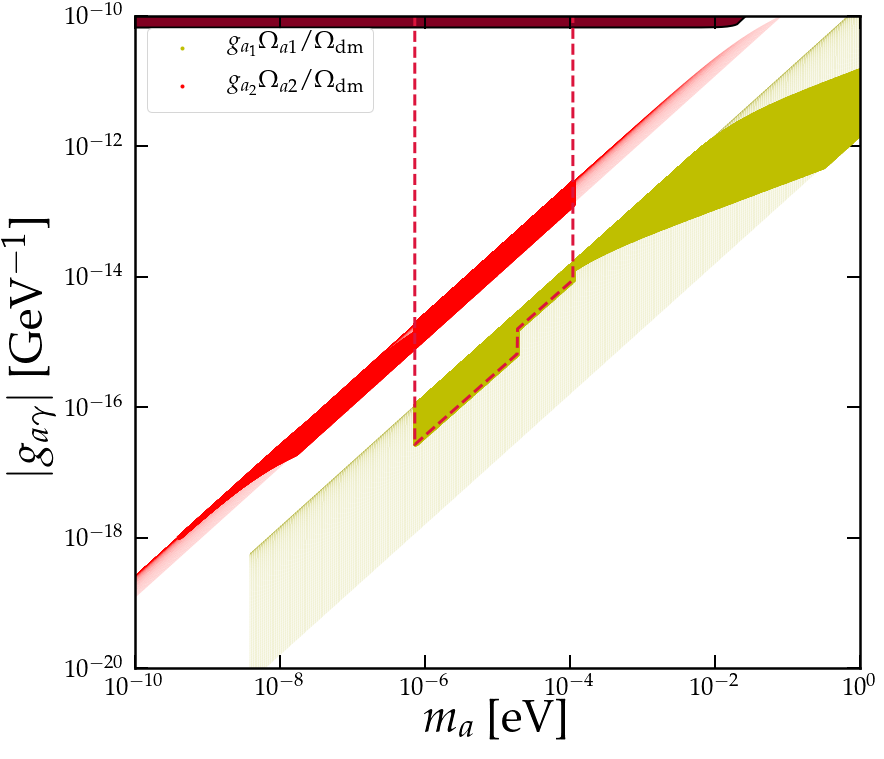

In [27]:
from PlotFuncs import AxionPhoton

k = 0.04
f,eps = meshgrid(fvals,epsvals)
m1,m2,g1,g2 = Couplings(fvals,eps)
Omega_a1 = 1/(1+k**0.41*eps**(-7/6))
Omega_a2 = 1/(1+k**-0.41*eps**(7/6))

fig,ax = MySquarePlot(r'$m_a$ [eV]','$|g_{a\gamma}|$ [GeV$^{-1}$]')

AxionPhoton.Helioscopes(ax,text_on=False)

P1 = sqrt(Omega_a1.flatten())
P2 = sqrt(Omega_a2.flatten())

g1_rs = g1.flatten()*P1
g2_rs = g2.flatten()*P2

mask = (ADMX_m1+ADMX_m2)>0
mask = mask.flatten()

plt.plot(m1.flatten()[mask],g1_rs[mask],'y.',label=r'$g_{a_1} \Omega_{a1}/\Omega_{\rm dm}$');
plt.plot(m2.flatten()[mask],g2_rs[mask],'r.',label=r'$g_{a_2} \Omega_{a2}/\Omega_{\rm dm}$');


plt.plot(m1.flatten(),g1_rs,'y,',alpha=0.01);
plt.plot(m2.flatten(),g2_rs,'r,',alpha=0.01)

dat = loadtxt('limit_data/AxionPhoton/Projections/ADMX_Projected.txt')
plt.plot(dat[:,0],dat[:,1],'k--',color='crimson',lw=3)

# dat = loadtxt('limit_data/AxionPhoton/Projections/DMRadio.txt')
# plt.plot(dat[:,0],dat[:,1],'--',color='royalblue',lw=3)

plt.legend()

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e-10,1e0])
ax.set_ylim([1e-20,1e-10])

In [39]:
2*(75.5)**4/1e3**4

6.4985700125e-05